# Automatisieren von Fehlerrechnung

- Gesucht: Unsicherheit von  $f(x_1,… x_m)$ , wenn  $x_i$  Unsicherheiten haben \
- Gaußsche Fehlerfortpflanzung:
$$\sigma_f = \sqrt{ \sum_{i=1}^m{\left(\frac{\partial f}{\partial x_i}\right)^2 \sigma_{x_i}^2}   }$$

- Manuelle Fehlerfortpflanzung:
    1. Berechne die Ableitungen von  𝑓  nach allen fehlerbehafteten Größen  𝑥𝑖 
    2. Ableitungen in die obere Formel einsetzen
    3. Werte und Unsicherheiten der  𝑥𝑖  einsetzen
- Probleme:
    - Kompliziert, dauert lange, man macht oft Fehler
    - Falsches Ergebnis, wenn  𝑥𝑖  korreliert sind, dann erweiterte Fehlerfortpflanzung:
    $$ \sigma_f = \sqrt{ \sum_{i=1}^m{\left(\frac{\partial f}{\partial x_i}\right)^2 \sigma_{x_i}^2} + \sum_{j 
eq k}{\frac{\partial f}{\partial x_j} \frac{\partial f}{\partial x_k} cov(x_j, x_k)}   }   $$
    - $cov(x_j, x_k)$  sind die Einträge der Kovarianzmatrix und beschreiben die Korrelation zwischen den Unsicherheiten von $x_j$ und $x_k$
    - konkret für zwei Messgrößen x, y, die  𝑁  mal gemessen wurden:
    $$ cov(x_j, x_k) = \frac{\sum_{i=1}^N{(x_i - \bar{x}) (y_i - \bar{y})} }{N}  $$
 


# Uncertainties
*Für mehr technische Details: https://pythonhosted.org/uncertainties/index.html*

In [ ]:
import uncertainties
import numpy as np

- Erlaubt es, Fehlerrechnung automatisch durchzuführen
- Datentyp: `ufloat(x, x_error)`, repräsentiert Wert mit Unsicherheit 

In [ ]:
from uncertainties import ufloat

x = ufloat(8, 1)
y = ufloat(3, 1)

x + y

### Erstellen von Zahlen mit uncertainties
- Zahlen können sowohl numerisch eingegeben werden, als auch aus String Darstellungen konvertiert werden
- Verschiedene Darstellungsweisen für einen Ausdruck möglich, Bsp.: x = 0.20±0.01

In [ ]:
x = ufloat(0.20, 0.01) # x = 0.20+/-0.01

In [ ]:
from uncertainties import ufloat_fromstr
x = ufloat_fromstr("0.20+/-0.01")
x = ufloat_fromstr("(2+/-0.1)e-01")  # Faktorisierter Exponent
x = ufloat_fromstr("0.20(1)")  # Kurzschreibweise
x = ufloat_fromstr("20(1)e-2")  # Exponentenschreibweise
x = ufloat_fromstr(u"0.20±0.01")  # Hübsche Druckschreibweise
x = ufloat_fromstr("0.20")  # Austomatisierte Unsicherheit von +/- 1 an der letzten Stelle

### Basic math
- direkte Berechnung mit reellen Zahlen:

In [ ]:
square = x**2
print(square)
half = x/2
print(half)

- Mathematische Operationen:

In [ ]:
from uncertainties.umath import *  # Importiert sin(), etc., siehe: https://pydoc.net/uncertainties/3.0.2/uncertainties.umath_core/
sin(x**2)
exp(x)

- Korrelationen zwischen Variablen werden automatisch behandelt, unabhängig von der Anzahl der beteiligten Variablen und der Komplexität der Berechnung.

In [ ]:
x = ufloat(3, 1)
y = ufloat(3, 1)

print(x - y)
print(x - x) # error is zero!

print(x == y)

### Arrays mit Zahlen und Unsicherheiten
- Es ist möglich Zahlen mit Unsicherheiten in `np.array` oder Matrizen hinzuzufügen

In [ ]:
arr = np.array([ufloat(1, 0.01), ufloat(2, 0.1)])
print(2 * arr)
print(arr.sum())

- Komplexere Operationen könnnen durch ein ergänzendes Modul `uncertainties.unumpy` durchgeführt werden
- **Achtung!** Es müssen die Funktionen/ Operatoren aus unumpy benutzt werden (Bsp.: `unp.sin` etc.)

In [ ]:
import uncertainties.unumpy as unp

x = [1, 2, 3, 4, 5]
err = [0.1, 0.3, 0.1, 0.8, 1.0]

y = unp.uarray(x, err)

unp.cos(unp.exp(y))

### Zugriff auf Wert und Standardabweichung
- Bei `ufloat` mit `n` und `s`:

In [ ]:
x = ufloat(5, 1)
print(x.n)
print(x.s)

- Bei `unumpy` mit `nominal_values` und `std_devs`:

In [ ]:
x = unp.uarray([1, 2, 3], [0.3, 0.3, 0.1])
print(unp.nominal_values(x))
print(unp.std_devs(x))

- Kann man natürlich auch abkürzen:

In [ ]:
from uncertainties.unumpy import (nominal_values as noms,
                                  std_devs as stds)

print(noms(x))
print(stds(x))

## Ausgabe von Werten
- typische Ausgabeform von Werten:

In [ ]:
x = ufloat(0.20, 0.01)
print(x)

- Nominal Wert und Unsicherheit haben die gleichen Dimensionen, was es einfacher macht die Werte miteinander zu vergleichen
- Ausgabeform kann mit Hilfe von `format()` kontrolliert werden

In [ ]:
print('Result = {:10.2f}'.format(x)) # auf 2 Nachkommastellen gerundet mit zusätzlichem Abstand zwischen den Werten

- Wenn bei Unsicherheiten die Anzahl der signifikanten Stellen der Unsicherheit gewählt werden muss, wird sie mit den Rundungsregeln der Particle Data Group definiert (diese Regeln halten die Anzahl der Stellen klein, was für das Ablesen von Zahlen mit Unsicherheiten bequem ist, und verhindern gleichzeitig, dass die Unsicherheit mit zu wenigen Stellen angezeigt wird):

In [ ]:
print('Automatic number of digits on the uncertainty: {}'.format(x))
print(x)

- Es ist möglich die Anzahl an signifikanten Stellen der Unsicherheit mit Hilfe eines Präzisionsmodifikators `u` einzustellen

In [ ]:
print('1 significant digit on the uncertainty: {:.1u}'.format(x))
print('3 significant digits on the uncertainty: {:.3u}'.format(x))
print('1 significant digit, exponent notation: {:.1ue}'.format(x))
print('1 significant digit, percentage: {:.1u%}'.format(x))

### Custom Options
- Weitere benutzerdefinierte Einstellungen möglich durch zuätzliche Endungen: `P`, `s`, `L`
- `P` für pretty-printing:

In [ ]:
print('{:.2e}'.format(x)) # exponentielle Schreibweise
print(u'{:.2eP}'.format(x)) # verschönerte Schreibweise

- `s` für Kurzschreibweise:

In [ ]:
print('{:+.1uS}'.format(x)) # Eine signignifikante Stelle für Unsicherheit

- `L` für LaTeX-Schreibweise:

In [ ]:
print(x*1e7)
print('{:L}'.format(x*1e7)) # Automatisierte Exponentenschreibweise

# Aufgabe 
Es sind einige fehlerbehaftete Messwerte gegeben:

x = 4.56 ± 0.2\
y = 2.11 ± 0.3\
z = 10 ± 1

Es soll nun der Fehler auf folgende Größe bestimmt werden:

Q = x² sin(y) + z

1. Berechne den Fehler manuell. Rechne dazu die Ableitungen von Q nach x, y und z aus und setze sie in die Formel für Gauß'sche Fehlerfortpflanzung ein. (siehe Skript)
Setze nun die Messwerte und ihre Fehler ein. (Dazu kannst du IPython als Taschenrechner benutzen)
2. Berechne den Fehler mit uncertainties und vergleiche die beiden Ergebnisse.



In [1]:
from uncertainties import ufloat
from uncertainties.unumpy import sin

x = ufloat(4.56, 0.2)
y = ufloat(2.11, 0.3)
z = ufloat(10, 1)

Q = x**2 * sin(y) + z

print(f'Q = {Q}')

Q = 28+/-4


# Aufgabe 2
Gegeben ist eine Messung mit den ermittelten Unsicherheiten. Berechne mit diesen Werten die Funktion: $$f(x) = sin(x)^2 $$
und plotte anschließend mit den resultierenden Unsicherheiten. Stelle zusätzlich die zu berechnende Funktion als Referenz zu den Messwerten dar.
Achte darauf, dass du alle notwedigen Pakete geladen hast. 
Ziel ist es die eben gelerneten Methoden anzuwenden. 

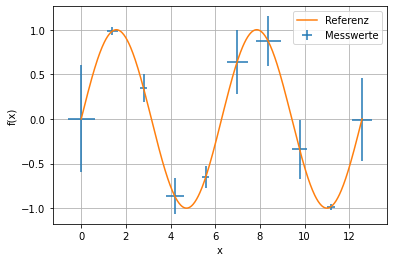

In [47]:
import numpy as np
from uncertainties import ufloat
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
x = np.array([ 0. ,  1.39 ,  2.79 ,  4.18 ,  5.58,  6.98,  8.37,  9.77, 11.17, 12.56])
x_err = np.array([0.60 , 0.24,  0.17,  0.40,  0.16,  0.47, 0.57,  0.35, 0.19, 0.46 ])

x_comp = unp.uarray(x, x_err)

fx = unp.sin(x_comp)
c = np.linspace(0, 4*np.pi, 500)
plt.grid()
plt.errorbar(x, unp.nominal_values(fx), yerr= unp.std_devs(fx), xerr= unp.std_devs(x_comp), fmt=' ', label= 'Messwerte')
plt.plot(c, sin(c), label='Referenz')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [ ]:
np.